In [1]:
import pandas  as pd # Pandas is a library for data manipulation and analysis. It offers data structures and operations for tables
import numpy   as np # NumPy is a library, supporting for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
# sklearn is a library for machine learning
from sklearn.model_selection import train_test_split # Splits arrays or matrices into random train and test subsets.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
# Different modules to extract information and analyze the dataset
import matplotlib.pyplot as plt # A python library for plotting data
%matplotlib inline

# db = pd.read_excel('data_normalized_full_dummies.xlsx',sheet_name='db_merged_bill_demo') # Loads data file created in the previous steps
db = pd.read_excel('data_normalized_partial_dummies.xlsx',sheet_name='db_merged_bill_demo') # Loads data file created in the previous steps

### Accuracy, Precision, Recall<br />
* Binary classification: Positive or Negative<br />
* Possible classification outcomes:<br />
    TN -> True Negative: No default predicted no default<br />
    TP -> True Positive: Default predicted default<br />
    FN -> False Negative: No default predicted default<br />
    FP -> False Positive: Default predicted no default<br />
###### * Accuracy = $\frac{TP+TN}{TP+TN+FP+FN}$
###### * Precision = $\frac{TP}{TP+FP~(Predicted~positives)}$
###### * Recall = $\frac{TP}{TP+FN~(Actual~positives)}$

#### Confustion Matrix<br />
Actual$~~~~~$|$~~~~~~~~~$Predicted<br />
\--------------------------------------<br />
$~~~~~~~~~~~~~~~$|$~~~$Negative$~~~$Positive<br />
Negative$~~$|$~~~~~~$ TN $~~~~~~~~~~$ FP<br />
Positive$~~~$|$~~~~~~$ FN $~~~~~~~~~~$ TP<br />

In [25]:
X = db.drop('default payment in Jan 2022',axis=1) # Storing desired components to analysis 
# RS = RobustScaler()
# X = RS.fit_transform(X)
y = db['default payment in Jan 2022'] # Storing the default data in a variable
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=145,stratify=y)
# Splitting the dataset into 'test' and 'training' sets

In [3]:
def ConfusionM(ConfM): # A function to print the Confusion Matrix in percents
    indx = ['Paid (%)','Failed (%)']
    ConfM = pd.DataFrame(data=ConfM, index=indx, columns=indx)
    ConfM = np.round(100*ConfM/ConfM.sum().sum())
    return ConfM

In [4]:
metrics = pd.DataFrame(index=['Accuracy','Precision','Recall'],
                      columns=['Logistic Regression','Decision Tree','Naive Bayes'])
# Store the values of 'Accuracy', 'Precision', and 'Recall' 
# for the three predictive models 'Logistic Regression','Decision Tree', and'Naive Bayes'.

In [5]:
from sklearn.linear_model import LogisticRegression # Imports logistic Regression module

LogReg = LogisticRegression(random_state=45) # Creates an instance of logistic Regression module

LogReg.fit(X_train,y_train) # fitting the LogReg model to both the features and labels for training
y_pred_test = LogReg.predict(X_test) # predicting default/payment on the X_test dataset
metrics.loc['Accuracy','Logistic Regression']  = accuracy_score  (y_pred=y_pred_test,y_true=y_test)
metrics.loc['Precision','Logistic Regression'] = precision_score (y_pred=y_pred_test,y_true=y_test)
metrics.loc['Recall','Logistic Regression']    = recall_score    (y_pred=y_pred_test,y_true=y_test)

ConfM = confusion_matrix(y_pred=y_pred_test,y_true=y_test)
ConfusionM(ConfM)

/Volumes/Macintosh2/PythonTutorials/mongard.ir/my_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


,Paid (%),Failed (%)
Paid (%),86.0,3.0
Failed (%),9.0,2.0


In [6]:
from sklearn.tree import DecisionTreeClassifier # Imports Decision Tree Classifier module

DecTree = DecisionTreeClassifier(min_samples_split=30,min_samples_leaf=10,random_state=25)

DecTree.fit(X_train,y_train)
y_pred_test = DecTree.predict(X_test)
metrics.loc['Accuracy','Decision Tree']  = accuracy_score  (y_pred=y_pred_test,y_true=y_test)
metrics.loc['Precision','Decision Tree'] = precision_score (y_pred=y_pred_test,y_true=y_test)
metrics.loc['Recall','Decision Tree']    = recall_score    (y_pred=y_pred_test,y_true=y_test)

ConfM = confusion_matrix(y_pred=y_pred_test,y_true=y_test)
ConfusionM(ConfM)

,Paid (%),Failed (%)
Paid (%),85.0,4.0
Failed (%),6.0,5.0


In [7]:
from sklearn.naive_bayes import GaussianNB # Imports Gaussian Naive Bayes module

GNB = GaussianNB()
GNB.fit(X_train,y_train)

y_pred_test = GNB.predict(X_test)
metrics.loc['Accuracy','Naive Bayes']  = accuracy_score  (y_pred=y_pred_test,y_true=y_test)
metrics.loc['Precision','Naive Bayes'] = precision_score (y_pred=y_pred_test,y_true=y_test)
metrics.loc['Recall','Naive Bayes']    = recall_score    (y_pred=y_pred_test,y_true=y_test)

ConfM = confusion_matrix(y_pred=y_pred_test,y_true=y_test)
ConfusionM(ConfM)

,Paid (%),Failed (%)
Paid (%),77.0,11.0
Failed (%),5.0,6.0


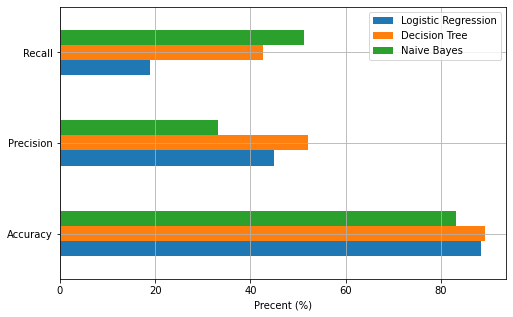

In [11]:
fig, ax = plt.subplots(figsize=(8,5))
(100*metrics).plot(kind='barh',ax=ax) # Plots the metrics variable created above to compare their efficiency
ax.set(xlabel='Precent (%)')
ax.grid();

In [12]:
perc_LR, recll_LR, th_LR = precision_recall_curve(y_true=y_test,probas_pred=LogReg.predict_proba(X_test)[:,1])
perc_DT, recll_DT, th_DT = precision_recall_curve(y_true=y_test,probas_pred=DecTree.predict_proba(X_test)[:,1])
perc_NB, recll_NB, th_NB = precision_recall_curve(y_true=y_test,probas_pred=GNB.predict_proba(X_test)[:,1])

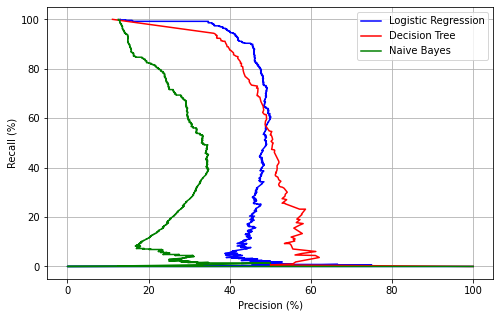

In [15]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(100*perc_LR,100*recll_LR, label='Logistic Regression', color='b')
ax.plot(100*perc_DT,100*recll_DT, label='Decision Tree'  , color='r')
ax.plot(100*perc_NB,100*recll_NB, label='Naive Bayes', color='g')
ax.set(xlabel='Precision (%)', ylabel='Recall (%)')
ax.legend()
ax.grid();

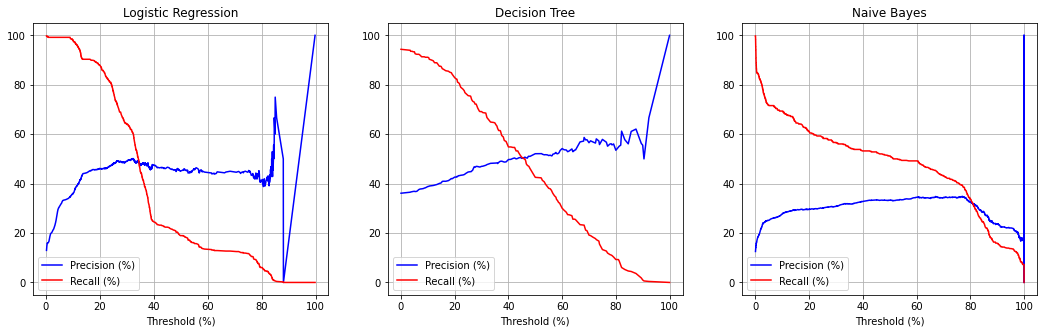

In [16]:
fig, axs = plt.subplots(1,3,figsize=(18,5))

axs[0].plot(100*th_LR,100*perc_LR[1:], label='Precision (%)', color='b')
axs[0].plot(100*th_LR,100*recll_LR[1:], label='Recall (%)', color='r')
axs[0].legend(); 
axs[0].grid();
axs[0].set(xlabel='Threshold (%)');
axs[0].set_title('Logistic Regression');

axs[1].plot(100*th_DT,100*perc_DT[1:], label='Precision (%)', color='b')
axs[1].plot(100*th_DT,100*recll_DT[1:], label='Recall (%)', color='r')
axs[1].legend(); 
axs[1].grid();
axs[1].set(xlabel='Threshold (%)');
axs[1].set_title('Decision Tree');

axs[2].plot(100*th_NB,100*perc_NB[1:], label='Precision (%)', color='b')
axs[2].plot(100*th_NB,100*recll_NB[1:], label='Recall (%)', color='r')
axs[2].legend(); 
axs[2].grid();
axs[2].set(xlabel='Threshold (%)');
axs[2].set_title('Naive Bayes');


In [28]:
Threshold = 0.1
print('Threshold is ',Threshold)

y_pred_proba = LogReg.predict_proba(X_test)[:,1]
y_pred_test  = (y_pred_proba >= Threshold).astype('int')

ConfM = confusion_matrix(y_pred=y_pred_test,y_true=y_test)
ConfusionM(ConfM)
print(22*'-')
print(f"{'Recall(LR):':15}"   , np.round(100*recall_score(y_pred=y_pred_test,y_true=y_test)),'%')
print(f"{'Precision(LR):':15}", np.round(100*precision_score(y_pred=y_pred_test,y_true=y_test)),'%')

y_pred_proba = DecTree.predict_proba(X_test)[:,1]
y_pred_test  = (y_pred_proba >= Threshold).astype('int')

ConfM = confusion_matrix(y_pred=y_pred_test,y_true=y_test)
ConfusionM(ConfM)
print(22*'=')
print(f"{'Recall(DT):':15}"   , np.round(100*recall_score(y_pred=y_pred_test,y_true=y_test)),'%')
print(f"{'Precision:(DT)':15}", np.round(100*precision_score(y_pred=y_pred_test,y_true=y_test)),'%')


y_pred_proba = GNB.predict_proba(X_test)[:,1]
y_pred_test  = (y_pred_proba >= Threshold).astype('int')

ConfM = confusion_matrix(y_pred=y_pred_test,y_true=y_test)
ConfusionM(ConfM)
print(22*'-')
print(f"{'Recall(GNB):':15}"   , np.round(100*recall_score(y_pred=y_pred_test,y_true=y_test)),'%')
print(f"{'Precision(GNB):':15}", np.round(100*precision_score(y_pred=y_pred_test,y_true=y_test)),'%')
print(22*'=')

Threshold is  0.1
----------------------
Recall(LR):     98.0 %
Precision(LR):  36.0 %
Recall(DT):     91.0 %
Precision:(DT)  38.0 %
----------------------
Recall(GNB):    69.0 %
Precision(GNB): 28.0 %
